In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Project Directory path
project_dir = 'drive/MyDrive/Colab Notebooks/'

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [ ]:
df = pd.read_csv(project_dir+ 'product_sales.csv')
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [ ]:
df.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

In [ ]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [ ]:
# check how many sales methods were used for that customer
print(df['sales_method'].drop_duplicates())

0              Email
1       Email + Call
2               Call
22         em + call
1693           email
Name: sales_method, dtype: object


In [ ]:
df['sales_method'] = df['sales_method'].replace('em + call','Email + Call')
df['sales_method'] = df['sales_method'].replace('email','Email')
print(df['sales_method'].drop_duplicates())

0           Email
1    Email + Call
2            Call
Name: sales_method, dtype: object


          revenue   nb_sold
revenue  1.000000  0.967843
nb_sold  0.967843  1.000000
          revenue   nb_sold
revenue  1.000000  0.989591
nb_sold  0.989591  1.000000
          revenue   nb_sold
revenue  1.000000  0.989591
nb_sold  0.989591  1.000000


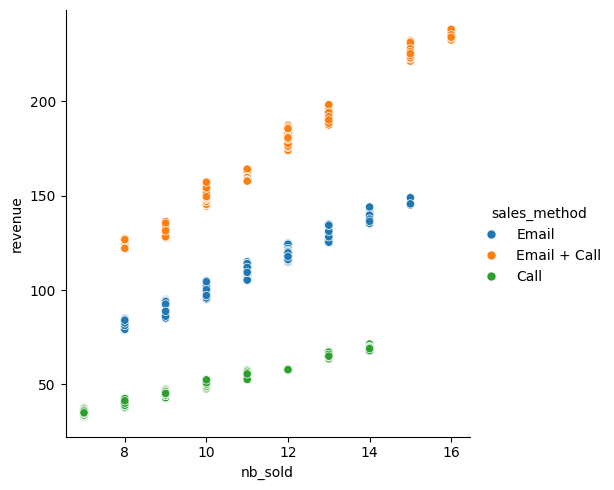

In [ ]:
import seaborn as sns
# Check the relationship between revenue column and nb_sold column by sales_method Email
df_Email = df[df['sales_method'] == 'Email']
print(df_Email[['revenue','nb_sold']].corr())
# Check the relationship between revenue column and nb_sold column by sales_method Email + Call
df_Email_Call = df[df['sales_method'] == 'Email + Call']
print(df_Email_Call[['revenue','nb_sold']].corr())
# Check the relationship between revenue column and nb_sold column by sales_method Call
df_Call = df[df['sales_method'] == 'Call']
print(df_Email_Call[['revenue','nb_sold']].corr())
# Visualize the relationship between revenue column and nb_sold column classified by sales_method.
sns.relplot(x='nb_sold', y='revenue', data=df,hue='sales_method')

In [ ]:
import statsmodels.formula.api as smf
# Create df_trainmodels
df_trainmodels = df[~df['revenue'].isna()]
# Create df_results
df_results = df[df['revenue'].isna()]
# Create the model then predict the missing values
x = smf.ols('revenue ~ nb_sold + C(sales_method)', data = df_trainmodels).fit()
results = x.predict(df_results)
print(results)

0         99.551250
3        108.302383
16        99.551250
17       208.270929
28       117.053516
            ...    
14951     51.964797
14957     25.711398
14970    182.017530
14992    182.017530
14999    190.768663
Length: 1074, dtype: float64


In [ ]:
# Fill missing values with results
df['revenue'] = df['revenue'].fillna(results)
print(df.head())

   week  sales_method                           customer_id  nb_sold  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9   

      revenue  years_as_customer  nb_site_visits      state  
0   99.551250                  0              24    Arizona  
1  225.470000                  1              28     Kansas  
2   52.550000                  6              26  Wisconsin  
3  108.302383                  3              25    Indiana  
4   90.490000                  0              28   Illinois  


In [ ]:
df['revenue'] = df['revenue'].round(2)

In [ ]:
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

<Axes: xlabel='sales_method', ylabel='revenue'>

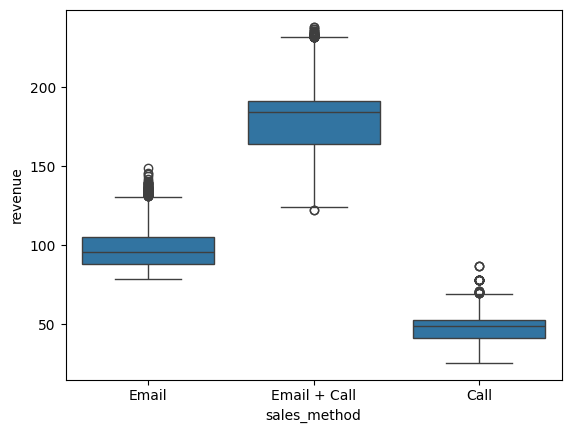

In [ ]:
# Visualize outliers
sns.boxplot(data = df, x = 'sales_method', y = 'revenue')

In [ ]:
import numpy as np
# Find outliers

def detect_outliers_iqr(data):
    outliers_lwr = []
    outliers_upr = []
    data = sorted(data)
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if i < lwr_bound:
            outliers_lwr.append(i)
        elif i > upr_bound:
            outliers_upr.append(i)
    return outliers_lwr, outliers_upr, lwr_bound, upr_bound

Email_outliers_lwr,Email_outliers_upr,Email_lwr_bound,Email_upr_bound = detect_outliers_iqr(df.loc[df['sales_method'] == 'Email', 'revenue'])
print(Email_outliers_lwr,Email_outliers_upr,Email_lwr_bound,Email_upr_bound)

Email_Call_outliers_lwr,Email_Call_outliers_upr,Email_Call_lwr_bound,Email_Call_upr_bound = detect_outliers_iqr(df.loc[df['sales_method'] == 'Email + Call', 'revenue'])
print(Email_Call_outliers_lwr,Email_Call_outliers_upr,Email_Call_lwr_bound,Email_Call_upr_bound)


Call_outliers_lwr,Call_outliers_upr,Call_lwr_bound,Call_upr_bound = detect_outliers_iqr(df.loc[df['sales_method'] == 'Call', 'revenue'])
print(Call_outliers_lwr,Call_outliers_upr,Call_lwr_bound,Call_upr_bound)


[] [131.16, 131.19, 131.2, 131.36, 131.41, 131.59, 131.63, 131.65, 131.66, 131.71, 131.74, 131.75, 131.78, 131.88, 131.91, 131.97, 132.01, 132.06, 132.12, 132.18, 132.21, 132.23, 132.26, 132.41, 132.44, 132.52, 132.55, 132.97, 133.07, 133.08, 133.09, 133.09, 133.13, 133.15, 133.22, 133.26, 133.27, 133.3, 133.38, 133.47, 133.59, 133.6, 133.82, 134.09, 134.11, 134.22, 134.23, 134.27, 134.37, 134.39, 134.47, 134.56, 134.95, 134.97, 135.1, 135.32, 135.42, 135.43, 135.46, 135.66, 135.81, 135.98, 136.23, 136.28, 136.34, 136.47, 136.62, 136.83, 136.89, 137.14, 137.29, 137.65, 137.82, 138.09, 138.12, 138.95, 139.14, 139.16, 139.2, 139.22, 139.7, 140.01, 140.66, 141.84, 144.01, 145.15, 145.71, 148.97] 62.43500000000001 131.015
[122.11, 122.32] [231.56, 231.62, 231.62, 231.65, 231.65, 231.74, 231.75, 231.75, 231.77, 231.83, 231.86, 231.94, 231.94, 232.01, 232.01, 232.02, 232.03, 232.07, 232.14, 232.21, 232.36, 232.47, 232.52, 232.55, 232.68, 232.73, 232.79, 232.83, 232.86, 232.89, 232.97, 233.03

In [ ]:
# Assign outliers to the upper bound of Email
x = (df.loc[df['sales_method'] == 'Email', 'revenue'].isin(Email_outliers_upr)) & (df['sales_method'] == 'Email')
df.revenue[x] = Email_upr_bound
# Assign outliers to the lower bound of Email + Call
y = (df.loc[df['sales_method'] == 'Email + Call', 'revenue'].isin(Email_Call_outliers_lwr)) & (df['sales_method'] == 'Email + Call')
df.revenue[y] = Email_Call_lwr_bound
# Assign outliers to the upper bound of Email + Call
z = (df.loc[df['sales_method'] == 'Email + Call', 'revenue'].isin(Email_Call_outliers_upr)) & (df['sales_method'] == 'Email + Call')
df.revenue[z] = Email_Call_upr_bound
# Assign outliers to the upper bound of Call
t = (df.loc[df['sales_method'] == 'Call', 'revenue'].isin(Call_outliers_upr)) & (df['sales_method'] == 'Call')
df.revenue[t] = Call_upr_bound

<Axes: xlabel='sales_method', ylabel='revenue'>

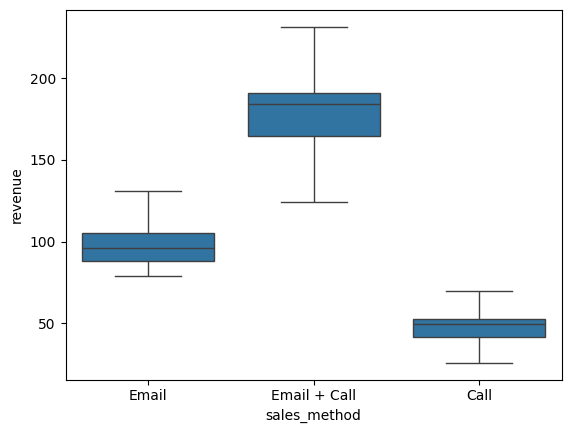

In [ ]:
sns.boxplot(data = df, x = 'sales_method', y = 'revenue')

Questions
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us to use if the results are similar.

**How many customers were there for each approach?**

In [ ]:
Customers = df.groupby('sales_method')['customer_id'].count()
print(Customers)

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64


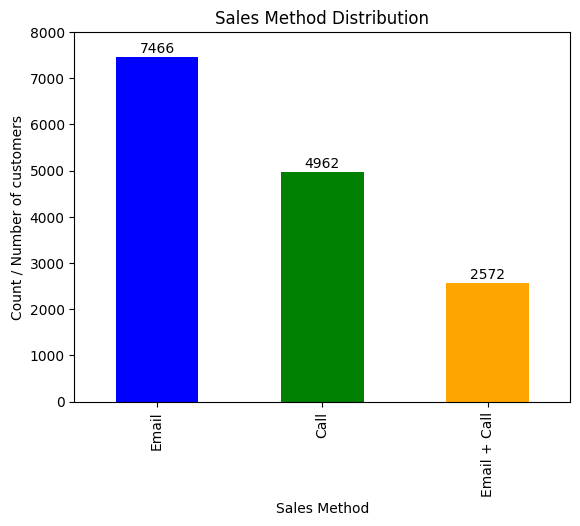

In [ ]:
import matplotlib.pyplot as plt
# Set custom colors for each sales method
custom_colors = ['blue', 'green','orange']
ax = df['sales_method'].value_counts().plot(kind='bar', title='Sales Method Distribution', color=custom_colors)
ax.bar_label(ax.containers[0], padding=1)
ax.set_ylim(0, 8000)
ax.set_xlabel("Sales Method")
ax.set_ylabel("Count / Number of customers")
plt.show()

##What does the spread of the revenue look like overall? And for each method?

Overall Revenue Distribution

Text(0.5, 1.0, 'Revenue Distribution')

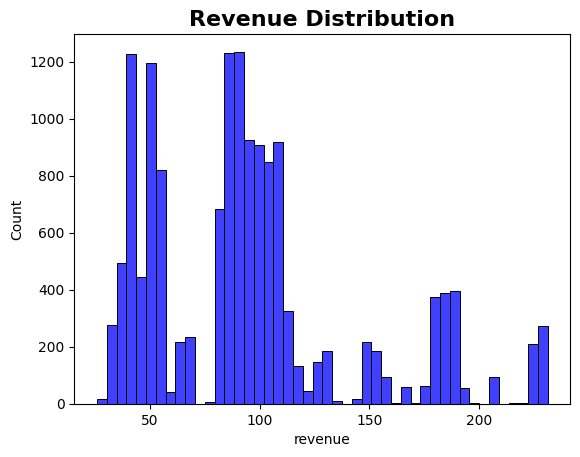

In [ ]:
sns.histplot(data=df, x="revenue", color="Blue").set_title('Revenue Distribution', fontdict={'size': 16, 'weight': 'bold'})

Revenue Distribution for each method

sales_method
Call            236340.10
Email           725212.99
Email + Call    473143.42
Name: revenue, dtype: float64


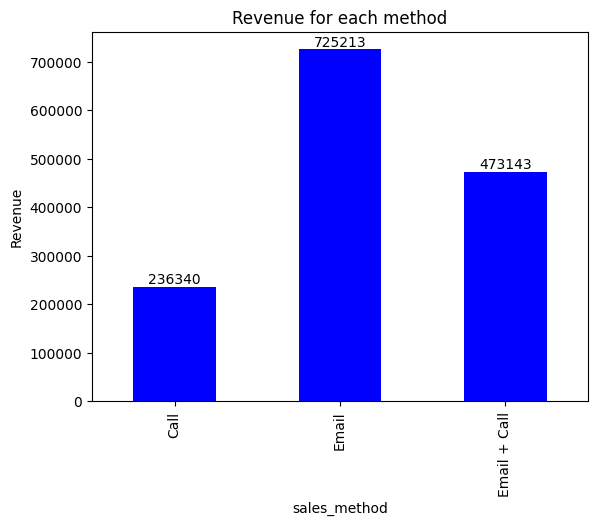

In [ ]:
Mean_revenue = df.groupby('sales_method')['revenue'].sum()
print(Mean_revenue)
cx = Mean_revenue.plot.bar(color = 'blue')
cx.bar_label(cx.containers[0], label_type='edge')
plt.xlabel('sales_method')
plt.ylabel('Revenue')
plt.title('Revenue for each method')
plt.show()

<ipython-input-23-7dbef1ea10a0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="revenue", y="sales_method", data=df, palette=custom_colors).set_title('Revenue per Sales Method', fontdict={'size': 16, 'weight': 'bold'})


Text(0.5, 1.0, 'Revenue per Sales Method')

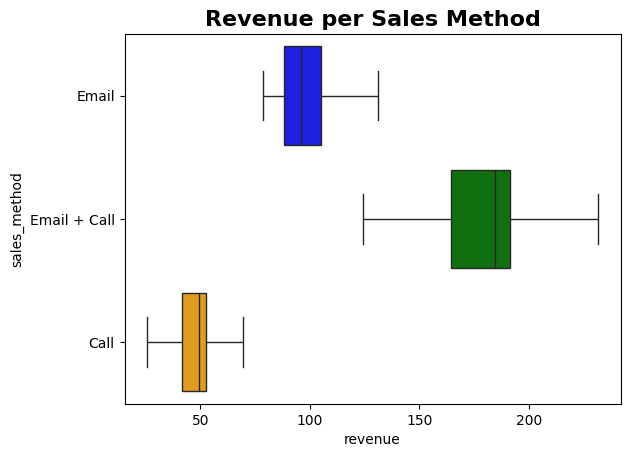

In [ ]:
sns.boxplot(x="revenue", y="sales_method", data=df, palette=custom_colors).set_title('Revenue per Sales Method', fontdict={'size': 16, 'weight': 'bold'})

##3)Was there any difference in revenue over time for each of the methods?

<ipython-input-24-07cf1e00d6e8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="week", y="revenue", hue="sales_method", ci=None).set_title('Revenue over time for each method', fontdict={'size': 16, 'weight': 'bold'})


Text(0.5, 1.0, 'Revenue over time for each method')

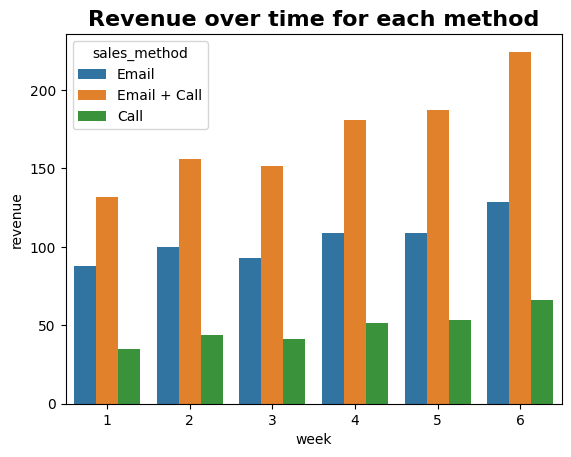

In [ ]:
sns.barplot(data=df, x="week", y="revenue", hue="sales_method", ci=None).set_title('Revenue over time for each method', fontdict={'size': 16, 'weight': 'bold'})

week  sales_method
1     Call             35.132863
      Email            87.550355
      Email + Call    131.711959
2     Call             43.533627
      Email           100.125350
      Email + Call    155.911550
3     Call             41.552284
      Email            92.921861
      Email + Call    151.797604
4     Call             51.536746
      Email           108.743777
      Email + Call    181.043313
5     Call             53.338985
      Email           108.767880
      Email + Call    187.414473
6     Call             66.304308
      Email           128.925051
      Email + Call    224.461012
Name: revenue, dtype: float64


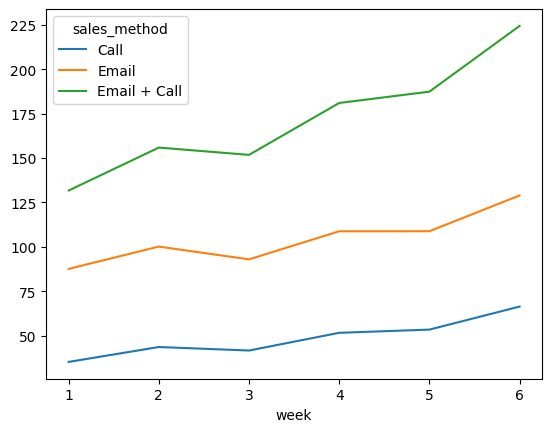

In [ ]:
dx = df.groupby(['week','sales_method'])['revenue'].mean()
dx.unstack().plot()
print(dx)

week  sales_method
1     Call             26630.710
      Email           246454.250
      Email + Call     19493.370
2     Call             35044.570
      Email           148786.270
      Email + Call     31182.310
3     Call             37480.160
      Email           106860.140
      Email + Call     54495.340
4     Call             51794.430
      Email           116899.560
      Email + Call     89616.440
5     Call             55685.900
      Email            80814.535
      Email + Call    147495.190
6     Call             29704.330
      Email            25398.235
      Email + Call    130860.770
Name: revenue, dtype: float64


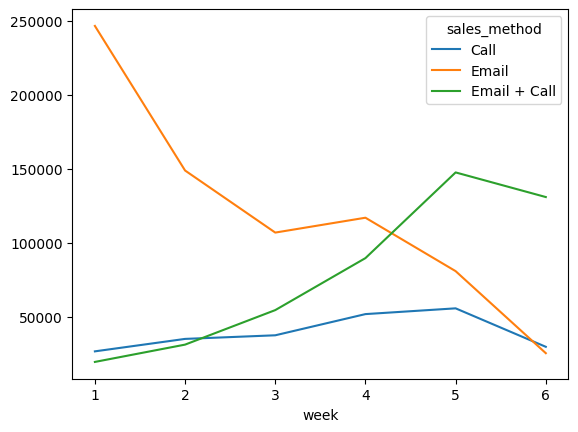

In [ ]:
cx = df.groupby(['week','sales_method'])['revenue'].sum()
cx.unstack().plot()
print(cx)

In [ ]:
pivot_table = df.pivot_table(index='week', columns='sales_method', values='revenue', aggfunc='sum')

print(pivot_table)

sales_method      Call       Email  Email + Call
week                                            
1             26630.71  246454.250      19493.37
2             35044.57  148786.270      31182.31
3             37480.16  106860.140      54495.34
4             51794.43  116899.560      89616.44
5             55685.90   80814.535     147495.19
6             29704.33   25398.235     130860.77
